# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
from sklearn.feature_selection import VarianceThreshold
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

**Data yang digunakan adalah Bank Transaction Data yang memiliki 16 atribut, yaitu sebagai berikut.**
- TransactionID: ID transaksi
- AccountID: ID akun, setiap akun dapat melakukan beberapa kali transaksi
- TransactionAmount: Nilai moneter dari setiap transaksi (USD)
- TransactionDate: Waktu terjadinya transaksi
- TransactionType: Kategori transaksi (“Credit” atau “Debit”)
- Location: Lokasi transaksi (US City names)
- DeviceID: ID Device untuk transaksi
- IP Address: Alamat Pv4 yang terkait dengan transaksi, terdapat perubahan sewaktu-waktu untuk beberapa akun
- MerchantID: ID merchant/penyedia layanan
- AccountBalance: Saldo di akun setelah transaksi (USD)
- PreviousTransactionDate: Waktu terjadi transaksi terakhir
- Channel: e.g., Online, ATM, Branch
- CustomerAge: Usia pemegang akun
- CustomerOccupation: Pekerjaan pemegang akun (e.g., Doctor, Engineer, Student, Retired)
- TransactionDuration: Durasi transaksi
- LoginAttempts: Jumlah percobaan login sebelum transaksi





In [190]:
df = pd.read_csv('bank_transactions_data.csv')
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Berikut EDA untuk Bank Transaction Data**

**1. Struktur Data**

In [191]:
# Melihat jumlah baris, jumlah kolom, dan tipe data setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Berdasarkan tinjauan di atas, terlihat bahwa:
1. Bank Transaction Data terdiri dari 2512 baris dan 16 kolom.
2. Tipe data untuk atribut `TransactionDate` dan `PreviousTransactionDate` masih berupa object dan harus diubah menjadi datetime



In [192]:
# Cek duplikasi
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2507,False
2508,False
2509,False
2510,False


Tidak terdapat duplikasi data

**2. Missing Values**

Berdasarkan df.info(), semua menunjukkan no-null, artinya tidak ada *missing values* yang harus ditangani

**3. Analisis Distribusi dan Korelasi**

In [193]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


a. TransactionAmount
- Total dari seluruh jumlah transaksi adalah USD 2512.
- Rata-rata jumlah transaksi adalah USD 297.593778.
- Jumlah transaksi terkecil USD 0.26 hingga terbesar USD 1919.11, hal ini menunjukkan bahwa distribusinya luas.
- Terdapat 25% transaksi dengan jumlah kurang dari USD 81.885.
- Sebagian besar transaksi berada di kisaran USD 414.52750.

b. CustomerAge

<Axes: >

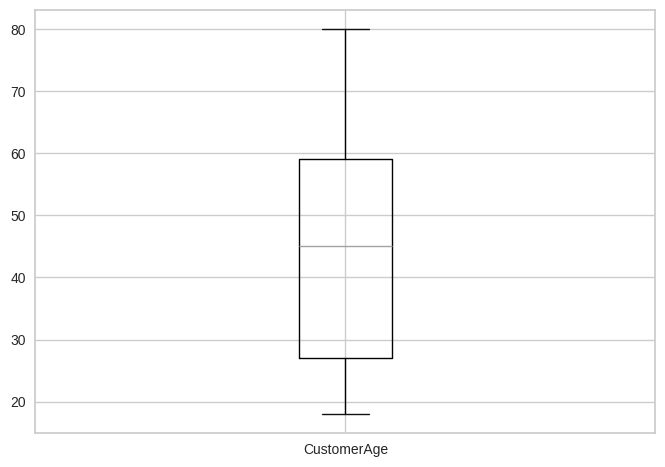

In [194]:
# CustomerAge Boxplot
df.boxplot('CustomerAge')

Berdasarkan Boxplot CustomerAge, dapat disimpulkan bahwa:
- Rentang usia *customers* mulai dari 18 tahun higgga 80 tahun.
- Rata-rata usia *cutomers* kisaran 45 tahun.
- Sebagian besar *customer* berada pada usia 59 tahun.
- Distribusi usia cukup merata karena *whiskers* yang tidak terlalu timpang (cukup proporsional).

c. TransactionDuration
- Rata-rata transaksi membutuhkan waktu 119.643312 detik
- Transaksi tercepat: 10 detik
- Transaksi terlama: 300 detik

d. LoginAttempts
- Rata-rata percobaan login yang telah dilakukan sebelum melakukan transaksi adalah 1 kali
- Percobaan login terbanyak: 5 kali

e. AccountBalance
- Rata-rata sisa saldo customer setelah melakukan transaksi adalah USD 5114.302966
- Sisa saldo paling sedikit setelah melakukan transaksi: USD 101.25
- Saldo terbanyak: USD 14977.99

f. TransactionType

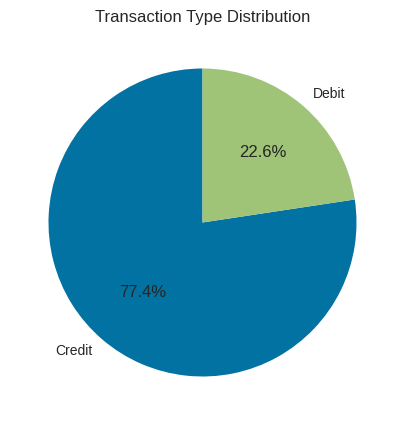

In [195]:
# TransactionType Pie Chart
plt.figure(figsize=(5,5))
plt.pie(df['TransactionType'].value_counts(), labels=['Credit', 'Debit'], autopct='%1.1f%%', startangle=90)
plt.title('Transaction Type Distribution')
plt.show()

Sebanyak 77.4% customers melakukan transaksi menggunakan Credit dan 22.6% menggunakan Debit.

g. Channel

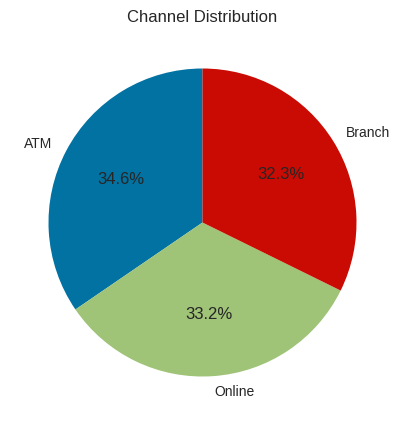

In [196]:
# Channel Pie Chart
plt.figure(figsize=(5,5))
plt.pie(df['Channel'].value_counts(), labels=['ATM', 'Online','Branch'], autopct='%1.1f%%', startangle=90)
plt.title('Channel Distribution')
plt.show()

- Sebanyak 34.6% cutomer melakukan transaksi menggunakan ATM.
- Sebanyak 33.2% cutomer melakukan transaksi secara Online.
- Sebanyak 32.3% cutomer melakukan transaksi di kantor cabang.

h. CustomerOccupation

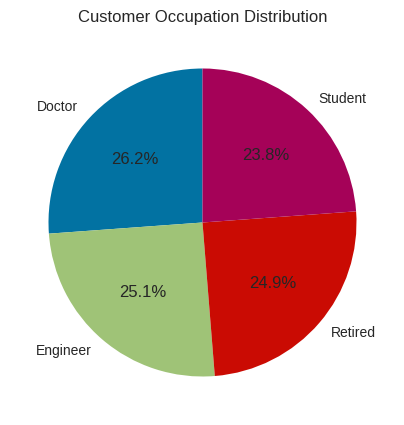

In [197]:
plt.figure(figsize=(5,5))
plt.pie(df['CustomerOccupation'].value_counts(), labels=['Doctor', 'Engineer','Retired','Student'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Occupation Distribution')
plt.show()

- 26.2% customers berprofesi sebagai Doctor
- 25.1% customers berprofesi sebagai Engineer
- 24.9% customers sebagai Retired
- 23.8% customers sebagai Student


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Berikut Data Preprocessing untuk Bank Transaction Data**

1. Tidak terdapat *missing value* dan duplikasi pada Bank Transaction Data


2. Menghapus atribut yang tidak digunakan.
Untuk melakukan deteksi penipuan transaksi, atribut yang digunakan adalah
`TransactionID`, `AccountID`,`TransactionAmount`, `TransactionDate`,`Location`, `Channel`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`, `PreviousTransactionDate`.

 Oleh karena itu, atribut yang perlu dihapus adalah  `TransactionType`, `MerchantID`, `CustomerAge`, `CustomerOccupation`, `DeviceID`, `IPAddress`.

In [198]:
drop_columns = ['TransactionType','MerchantID','CustomerAge','CustomerOccupation','DeviceID','IP Address']
df.drop(columns=drop_columns, inplace=True)

In [199]:
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

              Location Channel  TransactionDuration  LoginAttempts  \
0            San Diego     ATM                   81              

3. Deteksi dan penanganan *outlier*

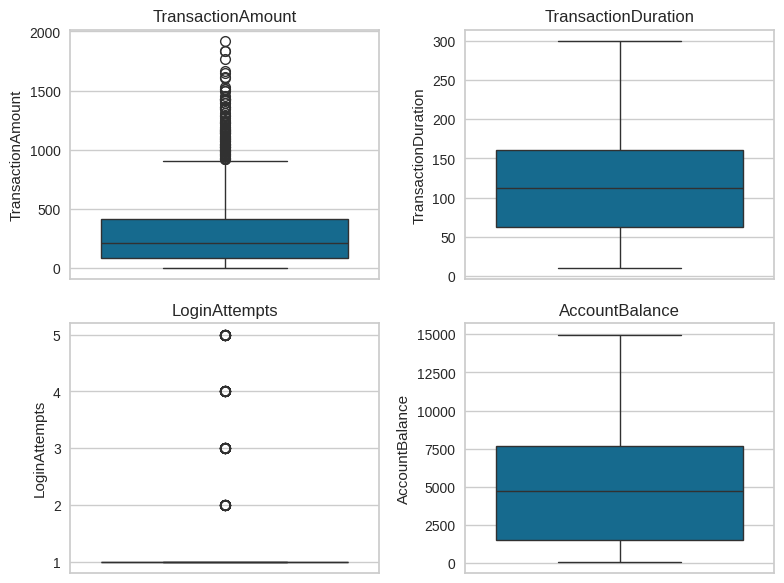

In [200]:
atribut = ['TransactionAmount','TransactionDuration','LoginAttempts','AccountBalance']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()
for i, atribut in enumerate(atribut):
    if i < len(atribut):
        sns.boxplot(y=df[atribut], ax=axes[i])
        axes[i].set_title(atribut, fontsize=12)
        axes[i].set_ylabel(atribut)
plt.tight_layout()
plt.show()

Berdasarkan Boxplot, berikut analisis *outlier* pada setiap atribut.

a. `TransactionAmount`: terdapat banyak jumlah transaksi yang sangat tinggi, sehingga terdapat banyak *outliers*.

b. `TransactionDuration`: *whiskers* mencangkup semua angka dan tidak terlihat adanya *outlier*.

c. `LoginAttempts`: terdapat beberapa *outlier* dengan percobaan login sebanyak 3, 4, sampai 5 kali.

d. `AccountBalance`: tidak terdapat angka ekstrem dan *whiskers* mencangkup semua angka, sehingga tidak terdapat *outlier*.

*Outlier* yang terdapat pada atribut `TransactionAmount` dan `LoginAttempts `tidak perlu dibersihkan. *Outlier* ini **perlu dipertahankan** karena dapat **mendeteksi penipuan** dalam transaksi.

5. Mengubah tipe data yang belum sesuai

 `TransactionDate` dan `PreviousTransactionDate` perlu diubah menjadi datetime

In [201]:
# Mengubah kolom menjadi format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

6. Membuat atribut baru yang dibutuhkan

Atribut tambahan yang membantu mendeteksi penipuan transaksi adalah
- `TransactionFreq`: menunjukkan berapa kali AccountID melakukan transaksi.
- `TimeInterval`: rentang waktu dilakukan transaksi dengan waktu transaksi sebelumnya.



In [202]:
# Membuat atribut TransactionFreq
df['TransactionFreq'] = df.groupby('AccountID')['TransactionID'].transform('count')

In [203]:
# Membuat atribut TimeInterval
df['TimeInterval'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds().abs() / (60 * 60 * 24)

 *Note: Data pada `TransactionDate` tampaknya tertukar dengan `PreviousTransactionDate`. Namun, kedua atribut ini hanya digunakan untuk menghitung interval waktu transaksi, sehingga dapat diatasi dengan
absolut.*

6. One-hot Encoding

 Encoding ini dilakukan pada atribut `Channel`

In [204]:
df = pd.get_dummies(df, columns=['Channel'], prefix=['Channel'], drop_first=False, dtype=int)

In [205]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFreq,TimeInterval,Channel_ATM,Channel_Branch,Channel_Online
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,81,1,5112.21,2024-11-04 08:08:08,7,572.652014,1,0,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,141,1,13758.91,2024-11-04 08:09:35,7,495.642546,1,0,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,56,1,1122.35,2024-11-04 08:07:04,4,482.577037,0,0,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,25,1,8569.06,2024-11-04 08:09:06,8,548.650637,0,0,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,198,1,7429.40,2024-11-04 08:06:39,6,384.593924,0,0,1


7. Standarisasi

In [206]:
X = ['TransactionAmount','TransactionDuration','LoginAttempts','AccountBalance','TransactionFreq','Channel_ATM','Channel_Branch','Channel_Online']
scaler = StandardScaler()
df[X] = scaler.fit_transform(df[X] )

In [207]:
df.info('X')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   Location                 2512 non-null   object        
 5   TransactionDuration      2512 non-null   float64       
 6   LoginAttempts            2512 non-null   float64       
 7   AccountBalance           2512 non-null   float64       
 8   PreviousTransactionDate  2512 non-null   datetime64[ns]
 9   TransactionFreq          2512 non-null   float64       
 10  TimeInterval             2512 non-null   float64       
 11  Channel_ATM              2512 non-null   float64       
 12  Channel_Branch           2512 non-

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Berikut Pembangunan Model Clustering Bank Transaction Data**

**K-Means**

a. Menentukan jumlah cluster
Metode elbow dengan model K-means bertujuan menemukan jumlah cluster yang optimal.

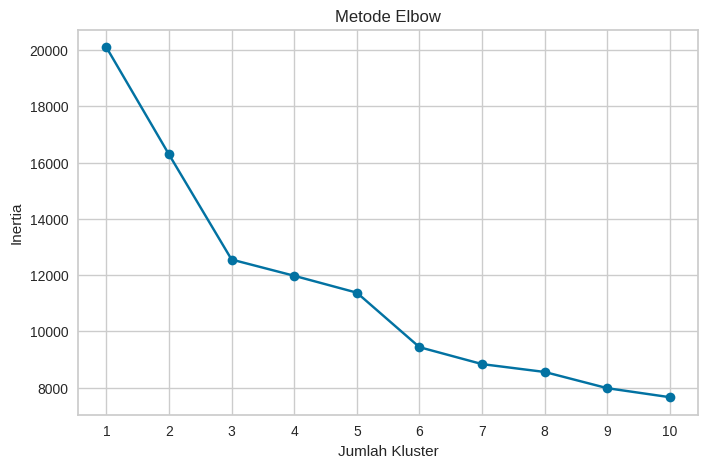

In [208]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[X])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [209]:
k_optimal = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
print(f"k optimal = {k_optimal.knee}")

k optimal = 3


Berdasarkan metode elbow,untuk kluster 1-2, 2-3 sangat curam, sehingga tidak memungkinkan untuk menjadi cluster optimal. Kluster 3-4 mulai landai, sehingga dapat berpotensi menjadi kluster optimal. Diasumsikan k=3 sebagai kluster optimal agar tidak terjadi overfitting karena banyaknya kluster.

b. K-means clustering

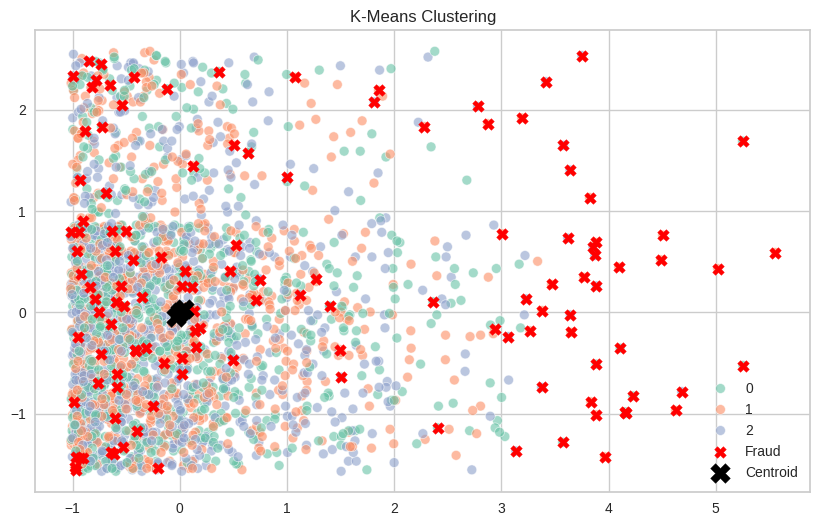

Jumlah transaksi yang berpotensi penipuan (fraud): 126


In [210]:
kmeans = KMeans(n_clusters=3, random_state=0)
data_cluster = df[X]
df['Cluster'] = kmeans.fit_predict(data_cluster)
distance = np.linalg.norm(data_cluster.values - kmeans.cluster_centers_[df['Cluster']], axis=1)
threshold = np.percentile(distance, 95)

# Fraud, jika jarak > threshold dan cluster besar (>= 20)
cluster_sizes = np.bincount(df['Cluster'])
df['Fraud'] = (distance > threshold) & (cluster_sizes[df['Cluster']] >= 20)
df['FraudLabel'] = df['Fraud'].map({True: 'Fraud', False: 'Not Fraud'})

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cluster.values[:, 0], y=data_cluster.values[:, 1], hue=df['Cluster'], palette='Set2', s=50, alpha=0.6)

fraud_points = df['Fraud']
plt.scatter(data_cluster.values[fraud_points, 0], data_cluster.values[fraud_points, 1], color='red', marker='X', s=70, label='Fraud')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='X', label='Centroid')

plt.title('K-Means Clustering')
plt.legend()
plt.show()
print(f"Jumlah transaksi yang berpotensi penipuan (fraud): {df['Fraud'].sum()}")

Cluster 0, 1, dan 2 sebagian besar terlihat padat di sekitar centroid. Hal ini  menunjukkan bahwa transaksi saling mirip berdasarkan atribut-atributnya, sehingga dapat dikategorikan normal.

Simbol fraud banyak yang saling berjauhan, beberapa jauh dari centroid, dan masuk ke dalam cluster besar. Hal ini menunjukkan bahwa transaksi berpotensi sebagai penipuan (fraud).

Metode K-means menghasilkan 126 jumlah transaksi yang berpotensi sebagai penipuan.


**DBSCAN**

a. Menentukan epsilon

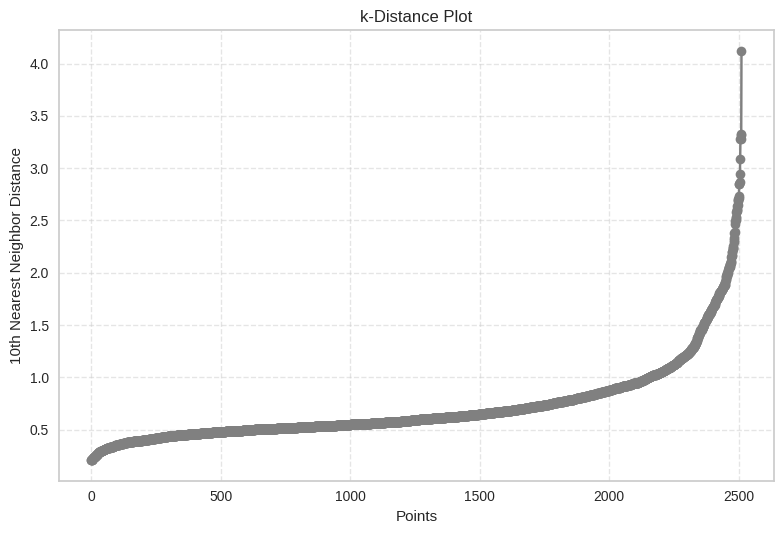

In [211]:
distances, _ = NearestNeighbors(n_neighbors=10).fit(df[X]).kneighbors(df[X])
sorted_distances = np.sort(distances[:, 4])
plt.plot(sorted_distances, marker='o', color='gray')
plt.title('k-Distance Plot')
plt.xlabel('Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Epsilon yang cocok berada di sekitar 1-2 karena plot masih landai, sedangkan setelah 1.5 plot naik curam. Oleh karena itu, diambil 1.5 sebagai epsilon.

b. DBSCAN Clustering

In [212]:
df['DBSCAN_Label'] = DBSCAN(eps=1.5, min_samples=10).fit_predict(df[X])
label_map = {
    -1: 'Fraud',
     0: 'Normal',
     1: 'Suspicious 1',
     2: 'Suspicious 2'}
df['DBSCAN_Cluster'] = df['DBSCAN_Label'].map(label_map)
df['DBSCAN_Fraud'] = df['DBSCAN_Cluster'].apply(lambda x: 'Fraud' if x == 'Fraud' else 'Not Fraud')

In [213]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df[X])
df['PCA_1'] = X_PCA[:, 0]
df['PCA_2'] = X_PCA[:, 1]

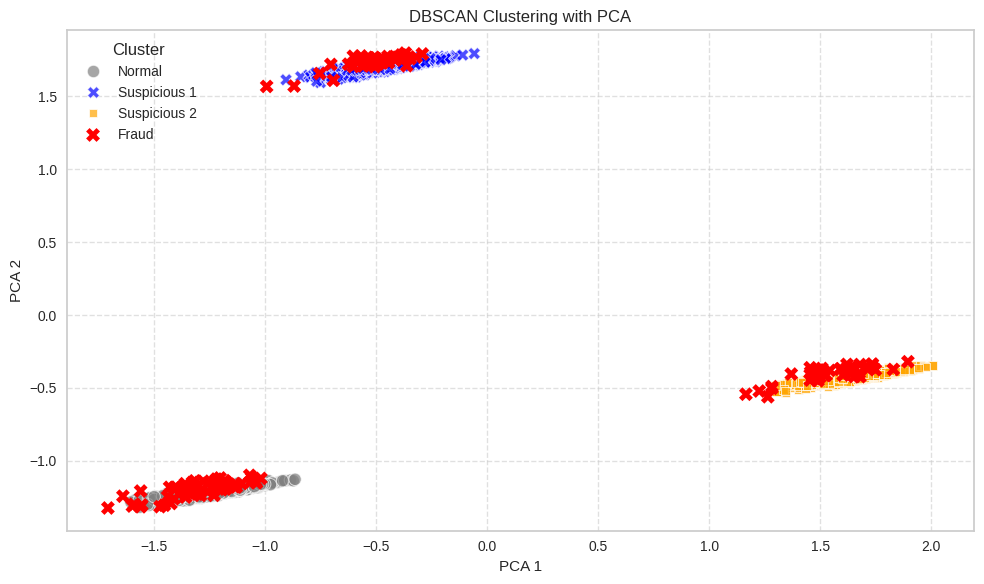

Jumlah transaksi yang berpotensi penipuan (fraud): 147


In [214]:
non_fraud = df[df['DBSCAN_Cluster'] != 'Fraud']
fraud = df[df['DBSCAN_Cluster'] == 'Fraud']
colors = {'Normal': 'gray', 'Suspicious 1': 'blue', 'Suspicious 2': 'orange'}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_fraud, x='PCA_1', y='PCA_2',
                hue='DBSCAN_Cluster', style='DBSCAN_Cluster', palette=colors, s=80, alpha=0.7)
markers={'Normal': 'o', 'Suspicious Group 1': 's', 'Suspicious Group 2': 'D'},
s=100,
alpha=0.8,
edgecolor='none'

plt.scatter(fraud['PCA_1'], fraud['PCA_2'], color='red', s=100, marker='X', label='Fraud',edgecolor='none' )
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print(f"Jumlah transaksi yang berpotensi penipuan (fraud): {len(fraud)}")

- Metode DBSCAN menghasilkan jumlah transaksi yang berpotensi penipuan (fraud) sebanyak 147.
- Fraud tersebar di setiap cluster dan umumnya keluar dari batar luar cluster.
- Masing-masing cluster sangat padat yang artinya epsilon dan min_samples cukup baik.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

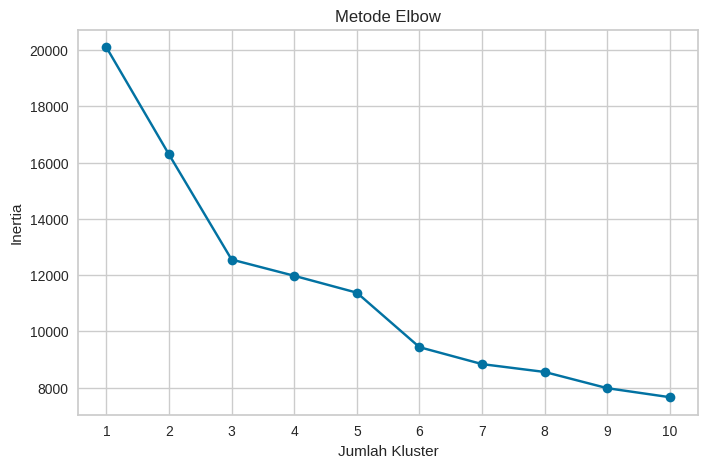

In [215]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[X])
    inertias.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [216]:
k_optimal = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
print(f"k optimal = {k_optimal.knee}")

k optimal = 3


In [217]:
k_optimal_value = k_optimal.knee
kmeans_optimized = KMeans(n_clusters=k_optimal_value, random_state=0, n_init=10, max_iter=300, tol=1e-6)
df['Cluster_KMeans_Optimized'] = kmeans_optimized.fit_predict(df[X])
sil_score_optimized = silhouette_score(df[X], df['Cluster_KMeans_Optimized'])
print(f"K-Means Silhouette Score): {sil_score_optimized:.4f}")

K-Means Silhouette Score): 0.3314


In [218]:
n_clusters_dbscan = len(set(df['DBSCAN_Label'])) - (1 if -1 in df['DBSCAN_Label'].values else 0)
if n_clusters_dbscan > 1:
    sil_score_dbscan = silhouette_score(X_PCA, df['DBSCAN_Label'])
    print(f"DBSCAN Silhouette Score: {sil_score_dbscan:.4f}")
else:
    print("Tidak cukup cluster")

DBSCAN Silhouette Score: 0.8208


- Jumlah cluster optimal adalah k=3, sehingga metode yang telah digunakan sebaiknya menggunakan 3 cluster. Pemilihan cluster yang telah diterapkan pada metode k-means dan DBSCAN sudah tepat k=3.
- Silhouette Score pada metode DBSCAN = 0.8208 yang berarti lebih tinggi dari metode k-means, yaitu=0.3314
- DBSCAN berpotensi menjadi metode clustering yang baik, tetapi perlu mengoptimalkan silhouette score pada k-means terlebih dahulu untuk dibandingkan.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Karena silhouette score pada metode k-means masih rendah, yaitu 0.3314, maka perlu dioptimalkan

In [219]:
selector = VarianceThreshold(threshold=0.5)
X_selected = selector.fit_transform(df[X])
k_optimal_value = k_optimal.knee
kmeans = KMeans(n_clusters=k_optimal_value, random_state=0)
df['Cluster_KMeans_Optimized'] = kmeans.fit_predict(X_selected)
sil_score = silhouette_score(X_selected, df['Cluster_KMeans_Optimized'])
print(f'Silhouette Score setelah Feature Selection: {sil_score:.4f}')

Silhouette Score setelah Feature Selection: 0.3314


Setelah dioptimalkan, silhouette score pada metode k-means **tidak mengalami perubahan**. Oleh karena itu, metode **DBSCAN lebih baik** karena memiliki silhouette score yang cukup tinggi, yaitu 0.8208.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

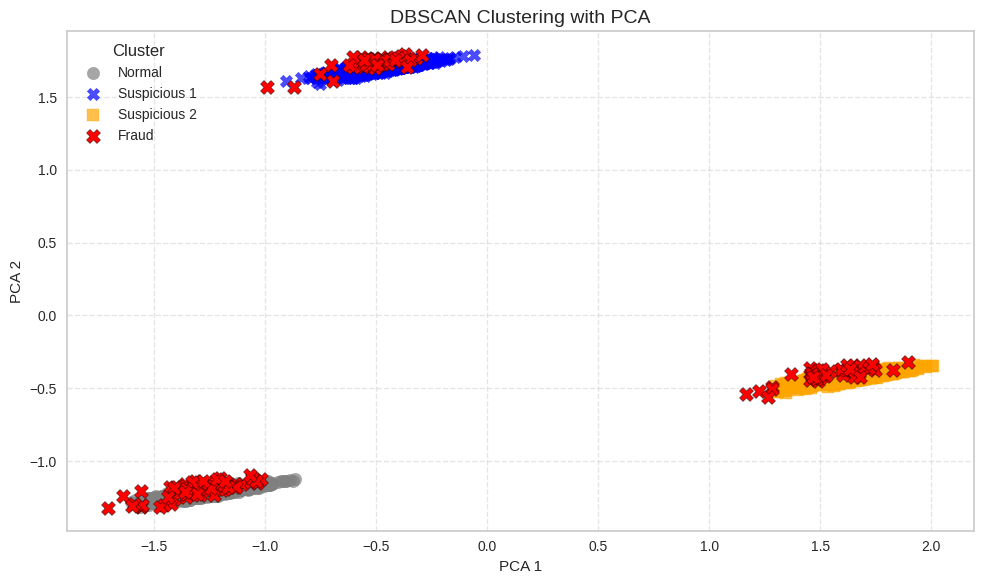

Jumlah transaksi yang berpotensi penipuan (fraud): 147


In [220]:
colors = {'Normal': 'gray', 'Suspicious 1': 'blue', 'Suspicious 2': 'orange'}
markers = {'Normal': 'o', 'Suspicious 1': 'X', 'Suspicious 2': 's'}
plt.figure(figsize=(10, 6))

for cluster_name, group in non_fraud.groupby('DBSCAN_Cluster'):
    plt.scatter(group['PCA_1'], group['PCA_2'], label=cluster_name, c=colors[cluster_name],
        marker=markers[cluster_name],s=80, alpha=0.7)

plt.scatter(fraud['PCA_1'], fraud['PCA_2'],color='red', s=100, marker='X', label='Fraud', edgecolor='black')

plt.title('DBSCAN Clustering with PCA', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print(f"Jumlah transaksi yang berpotensi penipuan (fraud): {len(fraud)}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(df[X]_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Berikut Pemberian Label

In [221]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(df[X])
df_scaled = pd.DataFrame(df[X], columns=X)
df_scaled['DBSCAN_Label'] = labels
label_map = {
    -1: 'Fraud',
     0: 'Normal',
     1: 'Suspicious 1',
     2: 'Suspicious 2'}
df_scaled['DBSCAN_Cluster'] = df_scaled['DBSCAN_Label'].map(label_map)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [222]:
df[X] = scaler.inverse_transform(df[X])

In [223]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFreq,...,Channel_Online,Cluster,Fraud,FraudLabel,DBSCAN_Label,DBSCAN_Cluster,DBSCAN_Fraud,PCA_1,PCA_2,Cluster_KMeans_Optimized
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,81.0,1.0,5112.21,2024-11-04 08:08:08,7.0,...,0.0,1,False,Not Fraud,0,Normal,Not Fraud,-1.101489,-1.180496,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,141.0,1.0,13758.91,2024-11-04 08:09:35,7.0,...,0.0,1,False,Not Fraud,0,Normal,Not Fraud,-1.152476,-1.189818,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,56.0,1.0,1122.35,2024-11-04 08:07:04,4.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.472373,1.687352,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,25.0,1.0,8569.06,2024-11-04 08:09:06,8.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.248590,1.740147,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,198.0,1.0,7429.40,2024-11-04 08:06:39,6.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.476948,1.718466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Colorado Springs,109.0,1.0,12690.79,2024-11-04 08:11:29,10.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.720189,-0.415941,2
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Tucson,177.0,1.0,254.75,2024-11-04 08:11:42,9.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.610073,-0.417022,2
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,San Diego,146.0,1.0,3382.91,2024-11-04 08:08:39,8.0,...,0.0,2,False,Not Fraud,2,Suspicious 2,Not Fraud,1.694537,-0.401088,2
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Denver,19.0,1.0,1776.91,2024-11-04 08:12:22,4.0,...,1.0,0,False,Not Fraud,1,Suspicious 1,Not Fraud,-0.437138,1.687370,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Berikut Interpretasi Hasil Clustering metode DBSCAN pada Bank Transaction Data**

In [224]:
distribusi_cluster = df.groupby('DBSCAN_Cluster')[['TransactionAmount','TransactionDuration',
                                                   'LoginAttempts','AccountBalance','TransactionFreq',
                                                   'Channel_ATM','Channel_Branch','Channel_Online']].describe()
distribusi_cluster

TransactionAmount                                         \
                           count        mean         std   min      25%   
DBSCAN_Cluster                                                            
Fraud                      147.0  462.945102  493.286135  1.93  115.980   
Normal                     774.0  287.907881  266.298391  0.32   83.270   
Suspicious 1               767.0  292.273312  280.184673  0.26   78.915   
Suspicious 2               824.0  282.146007  268.273402  0.45   82.545   

                                           TransactionDuration              \
                    50%       75%      max               count        mean   
DBSCAN_Cluster                                                               
Fraud           302.760  600.5600  1919.11               147.0  136.782313   
Normal          213.655  409.7125  1493.00               774.0  120.905685   
Suspicious 1    207.200  412.0400  1512.99               767.0  119.644068   
Suspicious 2    200.760  392.2250  1432.02               824.0  115.399272   

                ... Channel_Branch      Channel_Online                     \
                ...            75%  max          count     mean       std   
DBSCAN_Cluster  ...                                                         
Fraud           ...            1.0  1.0          147.0  0.29932  0.459526   
Normal          ...            0.0  0.0          774.0  0.00000  0.000000   
Suspicious 1    ...            0.0  0.0          767.0  1.00000  0.000000   
Suspicious 2    ...            1.0  1.0          824.0  0.00000  0.000000   

                                         
                min  25%  50%  75%  max  
DBSCAN_Cluster                           
Fraud           0.0  0.0  0.0  1.0  1.0  
Normal          0.0  0.0  0.0  0.0  0.0  
Suspicious 1    1.0  1.0  1.0  1.0  1.0  
Suspicious 2    0.0  0.0  0.0  0.0  0.0  

[4 rows x 64 columns]

**a. Cluster 0 (Normal)**

Berdasarkan visualisasi hasil clustering menggunakan metode DBSCAN, cluster 0 (normal) sangat padat di area tertentu. Cluster ini menunjukkan beberapa karakteristik dalam transaksi.
-  **Jumlah Data**: Terdapat 774 transaksi yang tergolong normal.

- **Rata-rata TransactionAmount**: Rata-rata jumlah transaksi yang tergolong normal adalah USD 288.

- **Rata-rata TransactionDuration**: Transaksi yang tergolong normal, rata-rata menghabiskan waktu 120 detik

- **Rata-rata LoginAttempts**: Transaksi yang tergolong normal, rata-rata hanya 1 kali percobaan login.

- **Rata-rata AccountBalance**: Saldo setelah transaksi yang tergolong normal, rata-rata sebesar USD 4936

- **Rata-rata TransactionFreq**: Rata-rata customers telah melakukan transaksi sebanyak 5-6 kali.

- **Channel yang digunakan**: Semua transaksi yang tergolong normal menggunakan channel ATM.

**Analisis**
Customers yang melakukan transaksi secara normal, nominal transaksi tidak terlalu besar dan waktu yang digunakan untuk transaksi tidak terlalu cepat dan tidak terlalu lama. Pada transaksi ini, semua customers menggunakan ATM, sehingga cukup meyakinkan dari pada secara Online karena perlu menggunakan mesin ATM secara fisik. Percobaan login juga hanya 1 kali, sehingga tergolong wajar dan tidak ada percobaan yang illegal.


**b. Cluster 1 (Suspicious 1)**

Cluster 1 (Suspicious 1)/cukup mencurigakan memiliki pola sangat padat di area tertentu yang cukup jauh dari cluster 0 (normal). Cluster ini menunjukkan beberapa karakteristik dalam transaksi.

- **Jumlah Data**: Terdapat 767 transaksi yang tergolong cukup mencurigakan.

- **Rata-rata TransactionAmount**: Rata-rata jumlah transaksi yang tergolong cukup mencurigakan adalah USD 292.

- **Rata-rata TransactionDuration**: Transaksi yang tergolong cukup mencurigakan, rata-rata menghabiskan waktu 119 detik

- **Rata-rata LoginAttempts**: Transaksi yang tergolong cukup mencurigakan, rata-rata 1 kali percobaan login.

- **Rata-rata AccountBalance**: Saldo setelah transaksi yang tergolong cukup mencurigakan, rata-rata sebesar USD 5079

- **Rata-rata TransactionFreq**: Rata-rata customers telah melakukan transaksi sebanyak 6 kali.

- **Channel yang digunakan**: Semua transaksi yang tergolong cukup mencurigakan menggunakan channel online.

**Analisis**
Customers yang melakukan transaksi secara cukup mencurigakan, nominal  cukup jauh di atas transaksi normal. Durasi transaksi tidak terlalu jauh berbeda dengan transaksi normal. Percobaan login juga hanya 1 kali, sehingga tergolong wajar dan tidak ada percobaan yang illegal. Pada transaksi ini, semua customers menggunakan channel online, sehingga cukup berpotensi sebagai penipuan dan perlu pemeriksaan lebih lanjut karena transaksi secara online dapat dilakukan secara mandiri tanpa mesin ATM dan petugas bank.

**b. Cluster 2 (Suspicious 2)**

Cluster 2 (Suspicious 2)/mencurigakan memiliki pola sangat padat di area tertentu yang jauh dari cluster 0 (normal). Cluster ini menunjukkan beberapa karakteristik dalam transaksi.

- **Jumlah Data**: Terdapat 824 transaksi yang tergolong mencurigakan.

- **Rata-rata TransactionAmount**: Rata-rata jumlah transaksi yang tergolong mencurigakan adalah USD 282.

- **Rata-rata TransactionDuration**: Transaksi yang tergolong mencurigakan, rata-rata menghabiskan waktu 115 detik

- **Rata-rata LoginAttempts**: Transaksi yang tergolong mencurigakan, rata-rata 1 kali percobaan login.

- **Rata-rata AccountBalance**: Saldo setelah transaksi yang tergolong mencurigakan, rata-rata sebesar USD 5218

- **Rata-rata TransactionFreq**: Rata-rata customers telah melakukan transaksi sebanyak 6 kali.

- **Channel yang digunakan**: Semua transaksi menggunakan channel Branch yang mana tidak berpotensi sebagai penipuan.

**Analisis**
Pada transaksi ini, semua customers menggunakan channel branch, sehingga tidak terlalu berpotensi sebagai penipuan. Namun, nominal transaksi cukup jauh di bawah transaksi normal.  Durasi transaksi juga lebih cepat transaksi normal. Percobaan login hanya 1 kali, sehingga tergolong wajar dan tidak ada percobaan yang illegal.  Oleh karena itu transaksi ini tergolong mencurigakan meskipun diperlu pemeriksaan lebih lanjut untuk mengidentifikasi transaksi ini.

**d. Fraud (penipuan)**

Terdapat 147 transaksi yang tergolong penipuan karena beberapa data yang cukup ekstrem.
- Rata-rata nominal transaksi sebesar USD 463 yang mana sangat tinggi dan sangat jauh dengan nominal transaksi pada cluster 0, 1, dan 2.
- Durasi transaksi juga jauh lebih lama dari pada cluster yang lain, yaitu 136 detik.
- Percobaan login yang cukup banyak, yaitu rata-rata 3 kali login.
- Nominal saldo setelah transaksi rata-rata USD 5645 yang mana juga jauh lebih besar dari transaksi normal.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [225]:
df.to_csv('hasil_clustering_fraud_detection.csv', index=False)
files.download('hasil_clustering_fraud_detection.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>